In [1]:
from finders.dataset_finder import DatasetFinder
age_dataset = DatasetFinder.load_match("dataset/agesonly.csv")
match_dataset = DatasetFinder.load_match("dataset/matchmaker.csv")

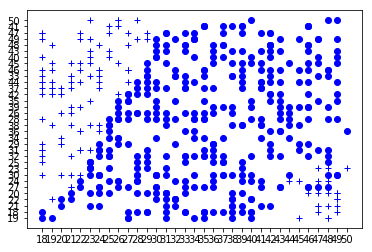

In [2]:
from services.plot_dataset_service import PlotDatasetService
PlotDatasetService(sorted(age_dataset, key=lambda x: x.data[0])).call()

In [3]:
from services.linear_averages_service import LinearAveragesService
LinearAveragesService(age_dataset).call()

{0: [26.914529914529915, 35.888888888888886],
 1: [35.48041775456919, 33.01566579634465]}

In [4]:
from models import MatchRow

# load_numerical_match
def yesno(value):
    return {'yes': 1, 'no': -1}.get(value, 0)
    
def matchcount(interest1, interest2):
    return len(set(interest1.split(':')).intersection(set(interest2.split(':'))))

data = DatasetFinder.load_match("dataset/matchmaker.csv")
newrows = []
for row in data:
    d = row.data
    data = [float(d[0]), yesno(d[1]), yesno(d[2]), 
            float(d[5]), yesno(d[6]), yesno(d[7]),
            matchcount(d[3], d[8]), row.match]
    newrows.append(MatchRow(data))

In [9]:
from services.scale_data_service import ScaleDataService
scalled_data, scale_f = ScaleDataService(newrows).call()

In [11]:
scalled_data[0].data


[0.65625, 1, 0, 0.78125, 0, 1, 0]

In [13]:
newrows[0].data

[39.0, 1, -1, 43.0, -1, 1, 0]